In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('atom.csv')
df = df.sort_values('Date').reset_index(drop=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-14,6.439715,6.639943,6.353963,6.526642,6.526642,7318172
1,2019-03-15,6.633174,7.715249,6.432468,7.504351,7.504351,6057301
2,2019-03-16,7.507990,8.305615,6.694531,7.383882,7.383882,3477393
3,2019-03-17,7.357443,7.357443,4.727895,4.776164,4.776164,2653565
4,2019-03-18,4.828242,5.229982,4.828242,5.110341,5.110341,2567201
...,...,...,...,...,...,...,...
1097,2022-03-15,26.837160,27.666176,26.222807,26.909143,26.909143,762055544
1098,2022-03-16,26.910126,29.017159,26.601332,29.000275,29.000275,982721763
1099,2022-03-17,28.994947,28.994947,28.153912,28.178936,28.178936,582547787
1100,2022-03-18,28.175051,28.756132,27.255075,28.698248,28.698248,689919140


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-14,6.439715,6.639943,6.353963,6.526642,6.526642,7318172
1,2019-03-15,6.633174,7.715249,6.432468,7.504351,7.504351,6057301
2,2019-03-16,7.507990,8.305615,6.694531,7.383882,7.383882,3477393
3,2019-03-17,7.357443,7.357443,4.727895,4.776164,4.776164,2653565
4,2019-03-18,4.828242,5.229982,4.828242,5.110341,5.110341,2567201


In [4]:
df.shape

(1102, 7)

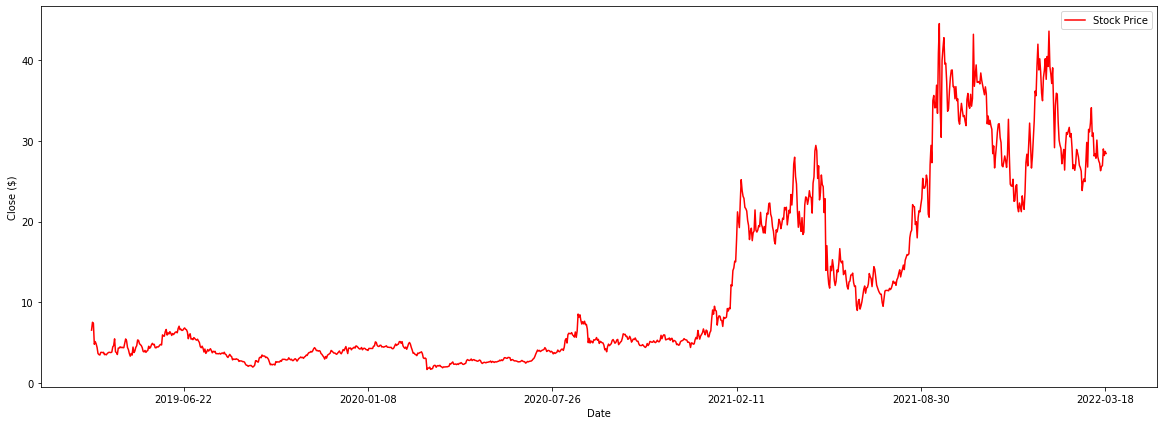

In [5]:
df['Close'] = df['Close'].astype(float)

plt.figure(figsize=(20,7))
plt.plot(df['Date'].values, df['Close'].values, label = 'Stock Price', color = 'red')
plt.xticks(np.arange(100,df.shape[0],200))
plt.xlabel('Date')
plt.ylabel('Close ($)')
plt.legend()
plt.show()


### Data Processing

In [6]:
num_shape = 2000

train = df.iloc[:num_shape, 1:2].values
test = df.iloc[num_shape:, 1:2].values



Scaling our features using normalization. Normalizing data helps the algorithm in converging i.e. to find local/ global minimum efficiently.


In [7]:
df=df.drop(['Date'], axis=1)
df

,Open,High,Low,Close,Adj Close,Volume
0,6.439715,6.639943,6.353963,6.526642,6.526642,7318172
1,6.633174,7.715249,6.432468,7.504351,7.504351,6057301
2,7.507990,8.305615,6.694531,7.383882,7.383882,3477393
3,7.357443,7.357443,4.727895,4.776164,4.776164,2653565
4,4.828242,5.229982,4.828242,5.110341,5.110341,2567201
...,...,...,...,...,...,...
1097,26.837160,27.666176,26.222807,26.909143,26.909143,762055544
1098,26.910126,29.017159,26.601332,29.000275,29.000275,982721763
1099,28.994947,28.994947,28.153912,28.178936,28.178936,582547787
1100,28.175051,28.756132,27.255075,28.698248,28.698248,689919140


Now we take one row and cut it with a window of 60 elements

In [8]:
df = df.iloc[1:]
df = df.fillna(method='ffill')
df.head()

,Open,High,Low,Close,Adj Close,Volume
1,6.633174,7.715249,6.432468,7.504351,7.504351,6057301
2,7.507990,8.305615,6.694531,7.383882,7.383882,3477393
3,7.357443,7.357443,4.727895,4.776164,4.776164,2653565
4,4.828242,5.229982,4.828242,5.110341,5.110341,2567201
5,5.099978,5.206172,4.794501,4.821883,4.821883,3891084


In [9]:
df["Open"].isnull().sum()

0

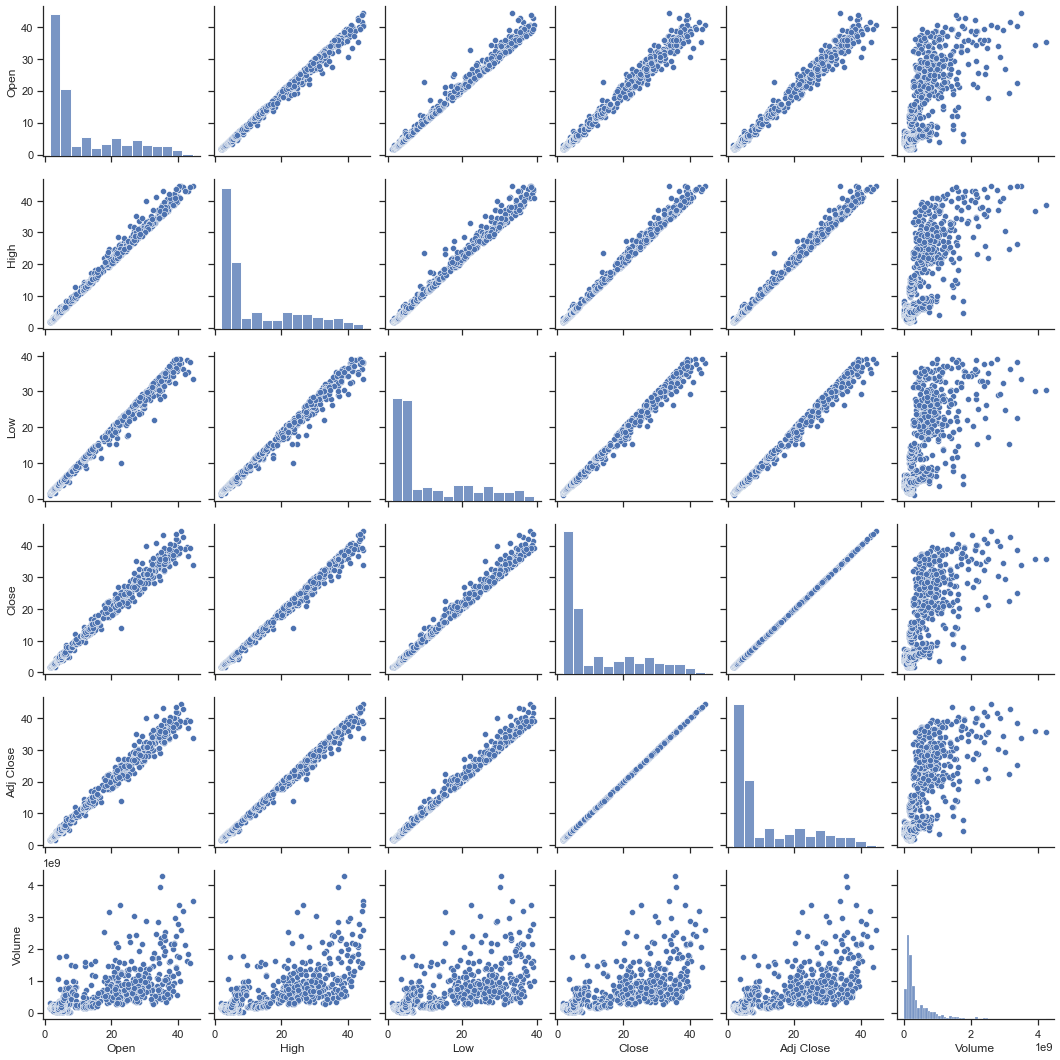

In [10]:
import seaborn as sb
sb.set(style="ticks", color_codes=True)
sb.pairplot(df)

<AxesSubplot:>

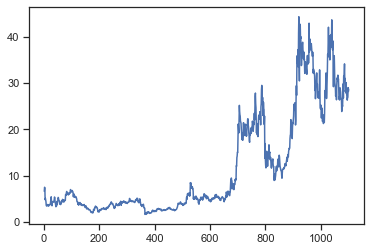

In [11]:
df["Open"].plot()

<AxesSubplot:>

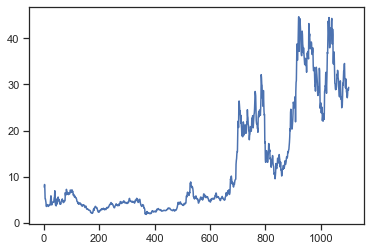

In [12]:
df["High"].plot()

<AxesSubplot:>

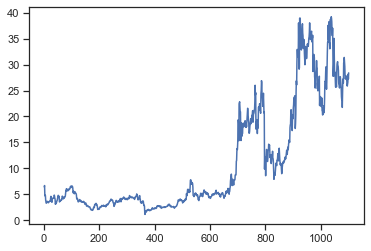

In [13]:
df["Low"].plot()

<AxesSubplot:>

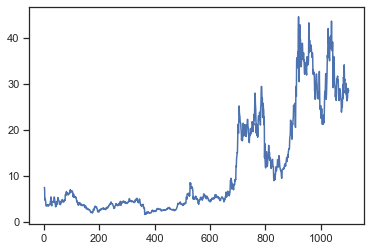

In [14]:
df["Close"].plot()

<AxesSubplot:>

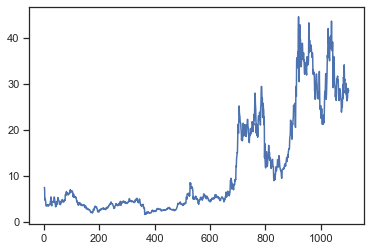

In [15]:
df["Adj Close"].plot()

<AxesSubplot:>

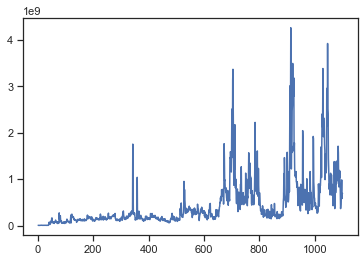

In [16]:
df["Volume"].plot()

In [17]:
df.pct_change(axis='columns', periods=-1)

,Open,High,Low,Close,Adj Close,Volume
1,-0.140251,0.199423,-0.142835,0.0,-0.999999,NaN
2,-0.096034,0.240657,-0.093359,0.0,-0.999998,NaN
3,0.000000,0.556177,-0.010106,0.0,-0.999998,NaN
4,-0.076815,0.083206,-0.055202,0.0,-0.999998,NaN
5,-0.020398,0.085863,-0.005679,0.0,-0.999999,NaN
...,...,...,...,...,...,...
1097,-0.029965,0.055043,-0.025506,0.0,-1.000000,NaN
1098,-0.072613,0.090816,-0.082721,0.0,-1.000000,NaN
1099,0.000000,0.029873,-0.000888,0.0,-1.000000,NaN
1100,-0.020207,0.055074,-0.050288,0.0,-1.000000,NaN


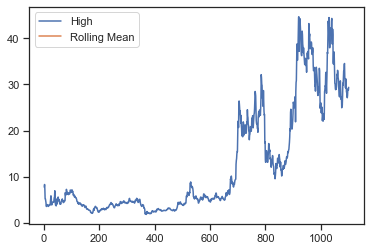

In [18]:
# Rolling window functions
rolling_google = df.High.rolling(0).mean()
df.High.plot()
rolling_google.plot()
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

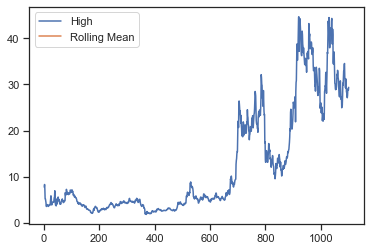

In [19]:
# Rolling window functions
rolling_google = df.Volume.rolling(0).mean()
df.High.plot()
rolling_google.plot()
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
normalised_data = min_max_scaler.fit_transform(df)
normalised_data = pd.DataFrame(normalised_data)
print(normalised_data)

             0         1         2         3         4         5
0     0.116847  0.137627  0.139175  0.136504  0.136504  0.000820
1     0.137369  0.151394  0.146055  0.133695  0.133695  0.000214
2     0.133838  0.129283  0.094427  0.072900  0.072900  0.000020
3     0.074505  0.079671  0.097061  0.080691  0.080691  0.000000
4     0.080879  0.079116  0.096175  0.073966  0.073966  0.000311
...        ...       ...       ...       ...       ...       ...
1096  0.590815  0.602879  0.658712  0.588898  0.588898  0.178362
1097  0.592526  0.634383  0.668649  0.637649  0.637649  0.230184
1098  0.641434  0.633865  0.709407  0.618501  0.618501  0.136205
1099  0.622200  0.628296  0.685811  0.630608  0.630608  0.161421
1100  0.634086  0.642945  0.716185  0.624348  0.624348  0.161506

[1101 rows x 6 columns]


Window functions are used to identify sub periods, calculates sub-metrics of sub-periods.

Rolling - Same size and sliding

Expanding - Contains all prior values

Now, observe that rolling mean plot is a smoother version of the original plot.



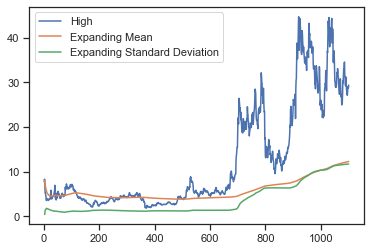

In [21]:
# Expanding window functions
microsoft_mean = df.High.expanding().mean()
microsoft_std = df.High.expanding().std()
df.High.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

## OHLC Charts

An OHLC chart is any type of price chart that shows the open, high, low and close price of a certain time period. Open-high-low-close Charts (or OHLC Charts) are used as a trading tool to visualise and analyse the price changes over time for securities, currencies, stocks, bonds, commodities, etc. OHLC Charts are useful for interpreting the day-to-day sentiment of the market and forecasting any future price changes through the patterns produced.

The y-axis on an OHLC Chart is used for the price scale, while the x-axis is the timescale. On each single time period, an OHLC Charts plots a symbol that represents two ranges: the highest and lowest prices traded, and also the opening and closing price on that single time period (for example in a day). On the range symbol, the high and low price ranges are represented by the length of the main vertical line. The open and close prices are represented by the vertical positioning of tick-marks that appear on the left (representing the open price) and on right (representing the close price) sides of the high-low vertical line.

Colour can be assigned to each OHLC Chart symbol, to distinguish whether the market is "bullish" (the closing price is higher then it opened) or "bearish" (the closing price is lower then it opened).

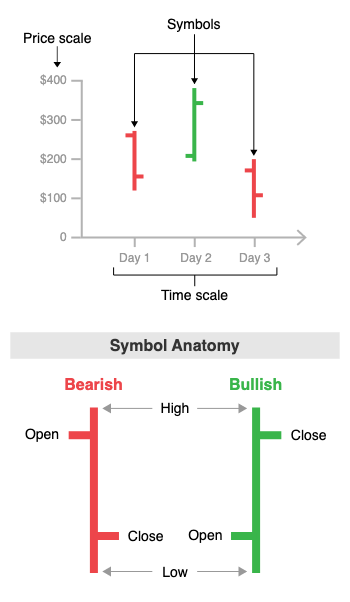

In [22]:
df=pd.read_csv('atom.csv')
df = df.sort_values('Date').reset_index(drop=True)

2.8 Autocorrelation and Partial Autocorrelation
Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.
Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

In [23]:
import statsmodels.api as sm

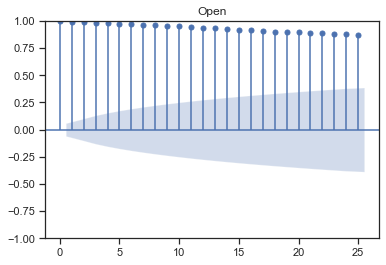

In [24]:
df = df.iloc[1:]
df = df.fillna(method='ffill')
df.head()
sm.graphics.tsa.plot_acf(df["Open"],lags=25,title="Open")
plt.show()

Partial Autocorrelation

c:\users\anant\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


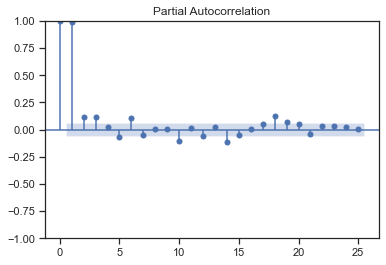

In [25]:
df = df.iloc[1:]
df = df.fillna(method='ffill')
df.head()
sm.graphics.tsa.plot_pacf(df["Open"],lags=25)
plt.show()

 Trends, seasonality and noise
These are the components of a time series

Trend - Consistent upwards or downwards slope of a time series
Seasonality - Clear periodic pattern of a time series(like sine funtion)
Noise - Outliers or missing values

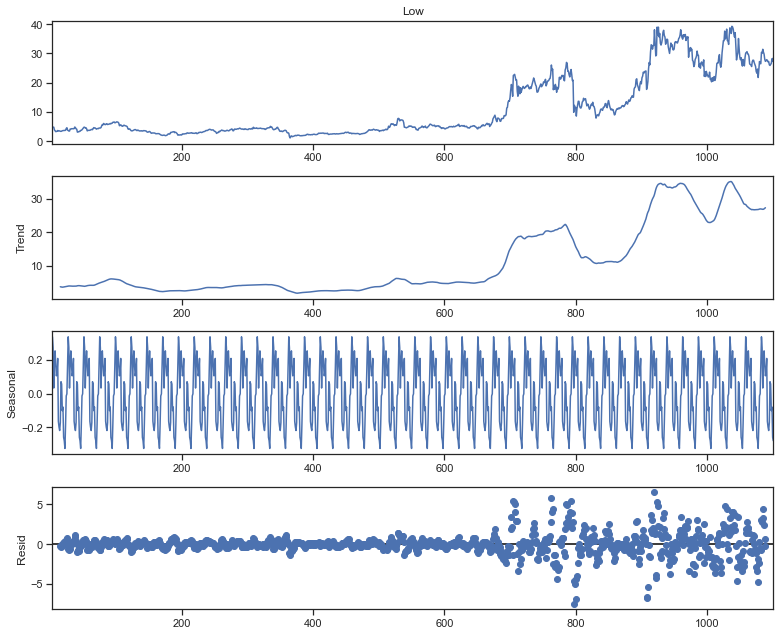

In [26]:
import matplotlib as mpl
from statsmodels.tsa.seasonal import seasonal_decompose
df = df.iloc[1:]
df = df.fillna(method='ffill')
df.head()
mpl.rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(df["Low"],period=24) # The frequncy is annual
figure = decomposed_google_volume.plot()
plt.show()

White noise
White noise has...

Constant mean
Constant variance
Zero auto-correlation at all lags

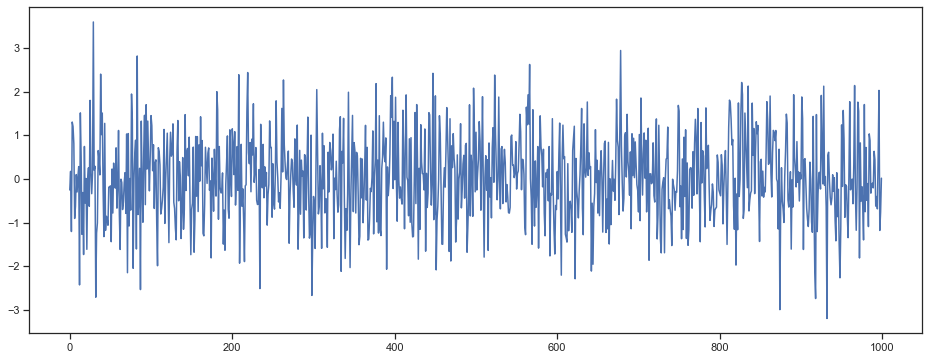

In [27]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

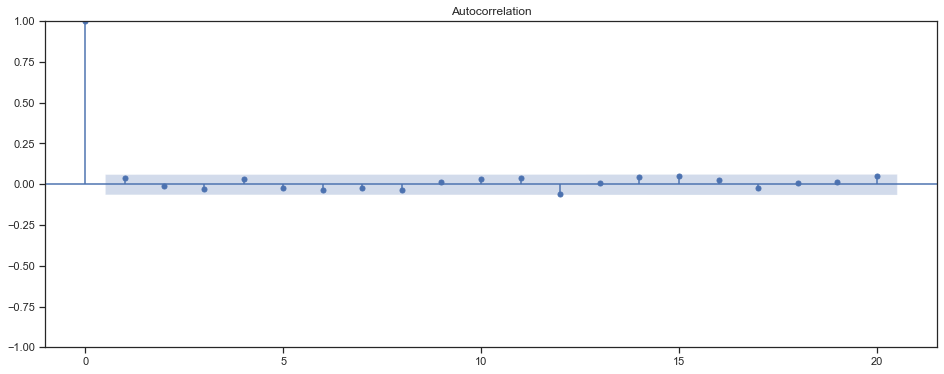

In [28]:
sm.graphics.tsa.plot_acf(white_noise,lags=20)
plt.show()